<a href="https://colab.research.google.com/github/mostlydipo/AI-Data-science/blob/main/Nba_roookie_data_Logistics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd # Data processing(files)
import numpy as np # Mathematics computation
import matplotlib.pyplot as plt # Plots and graphs

# Sklearn library for machine learning
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import seaborn as sns

In [ ]:
nba=pd.read_csv('nba_rookie_data.csv') # Extract data.
nba.head() # First 5 rows of the data.

,Name,Games Played,Minutes Played,Points Per Game,Field Goals Made,Field Goal Attempts,Field Goal Percent,3 Point Made,3 Point Attempt,3 Point Percent,...,Free Throw Attempts,Free Throw Percent,Offensive Rebounds,Defensive Rebounds,Rebounds,Assists,Steals,Blocks,Turnovers,TARGET_5Yrs
0,Brandon Ingram,36,27.4,7.4,2.6,7.6,34.7,0.5,2.1,25.0,...,2.3,69.9,0.7,3.4,4.1,1.9,0.4,0.4,1.3,0
1,Andrew Harrison,35,26.9,7.2,2.0,6.7,29.6,0.7,2.8,23.5,...,3.4,76.5,0.5,2.0,2.4,3.7,1.1,0.5,1.6,0
2,JaKarr Sampson,74,15.3,5.2,2.0,4.7,42.2,0.4,1.7,24.4,...,1.3,67.0,0.5,1.7,2.2,1.0,0.5,0.3,1.0,0
3,Malik Sealy,58,11.6,5.7,2.3,5.5,42.6,0.1,0.5,22.6,...,1.3,68.9,1.0,0.9,1.9,0.8,0.6,0.1,1.0,1
4,Matt Geiger,48,11.5,4.5,1.6,3.0,52.4,0.0,0.1,0.0,...,1.9,67.4,1.0,1.5,2.5,0.3,0.3,0.4,0.8,1


**Data cleaning(Remove errorneous values)**

In [ ]:
nba.isnull().any().any() # Check for null values.

True

In [ ]:
nba.dropna(inplace= True) # Drop null values where null is True

In [ ]:
nb = nba.drop('Name', axis=1) # Drop name column.
nb

,Games Played,Minutes Played,Points Per Game,Field Goals Made,Field Goal Attempts,Field Goal Percent,3 Point Made,3 Point Attempt,3 Point Percent,Free Throw Made,Free Throw Attempts,Free Throw Percent,Offensive Rebounds,Defensive Rebounds,Rebounds,Assists,Steals,Blocks,Turnovers,TARGET_5Yrs
0,36,27.4,7.4,2.6,7.6,34.7,0.5,2.1,25.0,1.6,2.3,69.9,0.7,3.4,4.1,1.9,0.4,0.4,1.3,0
1,35,26.9,7.2,2.0,6.7,29.6,0.7,2.8,23.5,2.6,3.4,76.5,0.5,2.0,2.4,3.7,1.1,0.5,1.6,0
2,74,15.3,5.2,2.0,4.7,42.2,0.4,1.7,24.4,0.9,1.3,67.0,0.5,1.7,2.2,1.0,0.5,0.3,1.0,0
3,58,11.6,5.7,2.3,5.5,42.6,0.1,0.5,22.6,0.9,1.3,68.9,1.0,0.9,1.9,0.8,0.6,0.1,1.0,1
4,48,11.5,4.5,1.6,3.0,52.4,0.0,0.1,0.0,1.3,1.9,67.4,1.0,1.5,2.5,0.3,0.3,0.4,0.8,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1335,80,15.8,4.3,1.6,3.6,43.3,0.0,0.2,14.3,1.2,1.5,79.2,0.4,0.8,1.2,2.5,0.6,0.2,0.8,0
1336,68,12.6,3.9,1.5,4.1,35.8,0.1,0.7,16.7,0.8,1.0,79.4,0.4,1.1,1.5,2.3,0.8,0.0,1.3,1
1337,43,12.1,5.4,2.2,3.9,55.0,0.0,0.0,0.0,1.0,1.6,64.3,1.5,2.3,3.8,0.3,0.3,0.4,0.9,0
1338,52,12.0,4.5,1.7,3.8,43.9,0.0,0.2,10.0,1.2,1.8,62.5,0.2,0.4,0.7,2.2,0.4,0.1,0.8,1


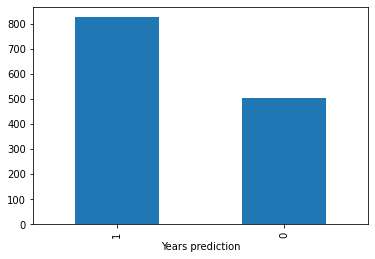

In [ ]:
ax = nb.TARGET_5Yrs.value_counts().plot(kind='bar').set_xlabel('Years prediction') # Vale count distribution

**Data wrangling(Scaling and structruting of data)**

In [ ]:
scaler = MinMaxScaler() # Transforms numeric feature data to range 0 to 1.
 
nbs = scaler.fit_transform(nb.to_numpy())
nbs = pd.DataFrame(nbs, columns=[
    'Games Played',	'Minutes Played',	'Points Per Game',	'Field Goals Made',	'Field Goal Attempts',	'Field Goal Percent',	'3 Point Made',	'3 Point Attempt'	,'3 Point Percent',
    'Free Throw Made',	'Free Throw Attempts',	'Free Throw Percent',	'Offensive Rebounds',	'Defensive Rebounds',	'Rebounds',	'Assists',	'Steals', 'Blocks',	'Turnovers',	'TARGET_5Yrs'])
 
print("Scaled Dataset Using MinMaxScaler")
nbs.head()

Scaled Dataset Using MinMaxScaler


,Games Played,Minutes Played,Points Per Game,Field Goals Made,Field Goal Attempts,Field Goal Percent,3 Point Made,3 Point Attempt,3 Point Percent,Free Throw Made,Free Throw Attempts,Free Throw Percent,Offensive Rebounds,Defensive Rebounds,Rebounds,Assists,Steals,Blocks,Turnovers,TARGET_5Yrs
0,0.352113,0.642857,0.243636,0.232323,0.357895,0.218437,0.217391,0.323077,0.250,0.207792,0.225490,0.699,0.132075,0.340426,0.279412,0.179245,0.16,0.102564,0.279070,0.0
1,0.338028,0.629630,0.236364,0.171717,0.310526,0.116232,0.304348,0.430769,0.235,0.337662,0.333333,0.765,0.094340,0.191489,0.154412,0.349057,0.44,0.128205,0.348837,0.0
2,0.887324,0.322751,0.163636,0.171717,0.205263,0.368737,0.173913,0.261538,0.244,0.116883,0.127451,0.670,0.094340,0.159574,0.139706,0.094340,0.20,0.076923,0.209302,0.0
3,0.661972,0.224868,0.181818,0.202020,0.247368,0.376754,0.043478,0.076923,0.226,0.116883,0.127451,0.689,0.188679,0.074468,0.117647,0.075472,0.24,0.025641,0.209302,1.0
4,0.521127,0.222222,0.138182,0.131313,0.115789,0.573146,0.000000,0.015385,0.000,0.168831,0.186275,0.674,0.188679,0.138298,0.161765,0.028302,0.12,0.102564,0.162791,1.0


In [ ]:
x= nbs.drop('TARGET_5Yrs', axis=1) # Dependent variables.
y= nbs['TARGET_5Yrs']  # Indepenent variable.

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.3, random_state=0) # Train, test and split data.

In [ ]:
x_train.shape # Length of training data.

(930, 19)

In [ ]:
x_test.shape # length of testinfg data.

(399, 19)

Text(0.5, 1.0, 'Response Variable Ratio, Raw')

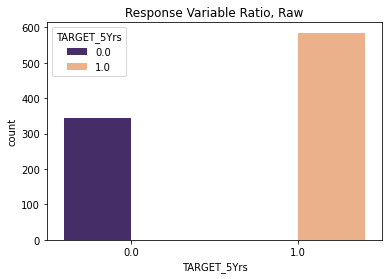

In [ ]:
y_t = pd.DataFrame(y_train)
Bar_chart=sns.countplot(data=y_t, x='TARGET_5Yrs', hue="TARGET_5Yrs", palette=['#432371',"#FAAE7B"])
Bar_chart.set_xticklabels(Bar_chart.get_xticklabels())

plt.title("Response Variable Ratio, Raw") # Distribution of our Target variable

In [ ]:
logre= LogisticRegression() # Logistic regression.
logre.fit(x_train, y_train)

LogisticRegression()

In [ ]:
predictions = logre.predict(x_test) # Prediction using the test data

In [ ]:
confusion_matrix(y_test,predictions) # The diagonal element of the matix((+)76,207) are right 

array([[ 76,  82],
       [ 34, 207]])

In [ ]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

         0.0       0.69      0.48      0.57       158
         1.0       0.72      0.86      0.78       241

    accuracy                           0.71       399
   macro avg       0.70      0.67      0.67       399
weighted avg       0.71      0.71      0.70       399



In [ ]:
accuracy_score(y_test,predictions) # Our logistic regression model is 71 pecent accurate

0.7092731829573935

In [ ]:
x_test[:5]

,Games Played,Minutes Played,Points Per Game,Field Goals Made,Field Goal Attempts,Field Goal Percent,3 Point Made,3 Point Attempt,3 Point Percent,Free Throw Made,Free Throw Attempts,Free Throw Percent,Offensive Rebounds,Defensive Rebounds,Rebounds,Assists,Steals,Blocks,Turnovers
1287,0.788732,0.190476,0.083636,0.080808,0.094737,0.398798,0.000000,0.000000,0.000,0.090909,0.107843,0.613,0.207547,0.170213,0.191176,0.075472,0.12,0.128205,0.162791
445,0.971831,0.452381,0.160000,0.171717,0.189474,0.448898,0.000000,0.000000,0.000,0.129870,0.137255,0.690,0.283019,0.265957,0.279412,0.094340,0.16,0.153846,0.372093
458,0.943662,0.349206,0.163636,0.191919,0.247368,0.332665,0.043478,0.030769,0.368,0.077922,0.088235,0.696,0.264151,0.202128,0.235294,0.141509,0.28,0.076923,0.255814
251,0.957746,0.470899,0.261818,0.303030,0.331579,0.450902,0.043478,0.046154,0.174,0.168831,0.215686,0.576,0.283019,0.223404,0.257353,0.198113,0.44,0.179487,0.372093
1251,0.422535,0.171958,0.123636,0.090909,0.121053,0.300601,0.086957,0.092308,0.360,0.181818,0.205882,0.682,0.094340,0.074468,0.080882,0.037736,0.12,0.102564,0.139535


In [ ]:
y_test[:5]

1287    1.0
445     1.0
458     1.0
251     1.0
1251    0.0
Name: TARGET_5Yrs, dtype: float64

In [ ]:
logre.predict(x_test[:5]) # Our model indicates player (1287,445,458,251,1251) will all last at least 5 years in the NBA which are all correct predictions correlating with
# y_test in the above cell

array([1., 1., 1., 1., 0.])